# BUSA3020 - Advanced Analytics Techniques {-}
## Week 3 Lecture - Classification Algorithms (Part 2) {-}


### Unit Convenor & Lecturer {-}
[George Milunovich](https://www.georgemilunovich.com)  
[george.milunovich@mq.edu.au](mailto:george.milunovich@mq.edu.au)

### References {-}

1. Python Machine Learning 3rd Edition by Raschka & Mirjalili - Chapter 3
2. Various open-source material

### Week 3 Learning Objectives {-}

- Introduce `scikit-learn` machine learning library
    - `train` vs `test` datasets: `train_test_split` library
    - Feature Scaling: train_test_split library
    - Fitting `Perceptron` & Measuring Classification Accuracy via `accuracy_score`
- Logistic Regression
    - logit function, log-odds, logistic signoid function
    - Predicting probabilities
    - Predicting class labels
    - `sklearn.linear_model.LogisticRegression` library
- Avoiding Overfitting via Regularization
    - Bias-Variance Tradeoff
    - L2 Shrinkage
    
    


---

## Choosing a Classification Algorithm {-}

When facing a practical forecasting problem the issue of which classification algorithm to use arises. 

In regards to this question two famous quotes come to mind:

- Famous statistician G. Box once said that **All models are wrong, but some are useful**
- Computer scientist D. Wolpert suggested that **No single classifier works best across all possible scenarios**  


Therefore, it is a good practice to train a number of different forecasting models and compare their predictive performance
- Choose the algorithm with produces best results in the given situation

There are 5 basic steps that we will follow when `training` a `supervised` machine learning algorithm:

1. Collect the data (labeled training examples)
2. Choose a performance metric (how to measure classification performance)
3. Choose a classifier (classification model) and optimization algorithm (how to train the model, e.g. Gradient Descent)
4. Evaluate the performance of the model (fit the model and see how well it performs)
5. Tune the algorithm (alterning hyperparameter values to get better performance)



---

## Training `perceptron` with `scikit-learn` {-}

In Week 2 we trained **perceptron** and **Adaline** on Iris dataset. 

Lets repeat what we did in Week 2 with the Iris dataset
- Extend the dataset to all 150 observations;
- All 3 classess of Iris;
- We can import data from scikit-learn directly; 
- Scikit-learn has a number of popular datasets included in its library.


---

### 1. Importing the Dataset {-}


```
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
# print(type(iris))
# print(iris)

print(dir(iris))

# print(iris['DESCR'])

print(iris['feature_names'])
print(iris['data'][:10,:])


X = iris['data'][:, [2, 3]] # columns indexed 2 & 3 correspond to petal length and petal width
print(X.shape)

y = iris['target']
print(type(y), y.shape, y)
print('Class labels:', np.unique(y)) #np.unique() finds unique values
```


In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
# print(type(iris))
# print(iris)

print(dir(iris))

# print(iris['DESCR'])

print(iris['feature_names'])
print(iris['data'][:10,:])


X = iris['data'][:, [2, 3]] # columns indexed 2 & 3 correspond to petal length and petal width
print(X.shape)

y = iris['target']
print(type(y), y.shape, y)
print('Class labels:', np.unique(y)) #np.unique() finds unique values

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 2)
<class 'numpy.ndarray'> (150,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class labels: [0 1 2]


---

### Training and Test Datasets {-}

- Lets split our data into **training** and **test** datasets
- We will use `train_test_split` library from sklearn for this purpose


```
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
print(y_train)
print(y_test)
```

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
print(y_train)
print(y_test)

[0 0 2 1 1 1 1 2 2 1 2 0 1 1 2 0 2 1 1 0 0 2 2 1 2 2 0 0 2 0 0 0 0 2 0 1 2
 1 2 2 1 1 2 2 1 1 2 1 1 0 2 0 2 0 0 1 0 1 2 0 2 0 0 2 2 0 1 0 0 1 2 1 1 0
 0 1 2 1 1 2 1 2 0 1 2 1 1 0 0 2 1 2 1 0 1 2 2 0 0 2 2 0 2 1 1 1 2 0 2 1 2
 0 2 0 1 0 1 0 0 0]
[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


Note the following:

- `train_test_split` function automatically splits between `training` and `test` dataset
- the size of the test dataset is 20% of all available observations, and the size of the training set is the remaining 80%
- `train_test_split` also randomizes the dataset before spliting it, this avoids for instance having all 0's and 1's in the training set and 2's in the test set
- `random_state = 1` sets a value for the random number generator which shuffles the dataset prior to splitting. This allows us to replicate our results (data always shuffled in the same way) 
- in addition to shuffling the dataset note that we also employ `stratify = y` option in `train_test_split()`. This ensures that the training and test datasets have the same proportions of class lables as the input dataset. 

Lets check counts and proportions of each class label in the 3 datasets using `bincount` function from NumPy
```
print(y_train)
print('Train Dataset', 'counts', np.bincount(y_train), 'proportions', np.bincount(y_train)/len(y_train))
print('Test Dataset', 'counts', np.bincount(y_test), 'proportions', np.bincount(y_test)/len(y_test))
```

In [6]:
print(y_train)
print('Train Dataset', 'counts', np.bincount(y_train), 'proportions', np.bincount(y_train)/len(y_train))
print('Test Dataset', 'counts', np.bincount(y_test), 'proportions', np.bincount(y_test)/len(y_test))


[0 0 2 1 1 1 1 2 2 1 2 0 1 1 2 0 2 1 1 0 0 2 2 1 2 2 0 0 2 0 0 0 0 2 0 1 2
 1 2 2 1 1 2 2 1 1 2 1 1 0 2 0 2 0 0 1 0 1 2 0 2 0 0 2 2 0 1 0 0 1 2 1 1 0
 0 1 2 1 1 2 1 2 0 1 2 1 1 0 0 2 1 2 1 0 1 2 2 0 0 2 2 0 2 1 1 1 2 0 2 1 2
 0 2 0 1 0 1 0 0 0]
Train Dataset counts [40 40 40] proportions [0.33333333 0.33333333 0.33333333]
Test Dataset counts [10 10 10] proportions [0.33333333 0.33333333 0.33333333]


---

### 3. Features Scaling {-}

In Week 2 we discussed how standardization of features can help optimization algorithms train classifiers. 

- `scikit-learn` contains `preprocessing` module which contains a number of classes used for standardization
- For now we will use `StandardScalar` class 
- Scale the data by doing the following transformation $X\sim(\mu, \sigma) \rightarrow Z(0, 1)$

Note that we use `training` dataset to estimate the parameters $\mu \text{ and } \sigma$ which are then used to standardize both the `training` and `test` datasets. 
- This prevents cheating and increasing forecast accuracy by assuming how the observations from the `test` dataset are distributed.

```
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3, suppress = True) # pretty printing

sc = StandardScaler()

sc.fit(X_train)

# print(dir(sc))
# print(sc.mean_, sc.scale_)


X_train_scaled = sc.transform(X_train)
print('means:', X_train.mean(axis=0), X_train_scaled.mean(axis=0))
print('sigmas', X_train.std(axis=0), X_train_scaled.std(axis=0))

X_test_scaled = sc.transform(X_test)
print('means:', X_test.mean(axis=0), X_test_scaled.mean(axis=0))
print('sigmas', X_test.std(axis=0), X_test_scaled.std(axis=0))

```


In [7]:
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3, suppress = True) # pretty printing

sc = StandardScaler()

sc.fit(X_train)

# print(dir(sc))
# print(sc.mean_, sc.scale_)


X_train_scaled = sc.transform(X_train)
print('means:', X_train.mean(axis=0), X_train_scaled.mean(axis=0))
print('sigmas', X_train.std(axis=0), X_train_scaled.std(axis=0))

X_test_scaled = sc.transform(X_test)
print('means:', X_test.mean(axis=0), X_test_scaled.mean(axis=0))
print('sigmas', X_test.std(axis=0), X_test_scaled.std(axis=0))

means: [3.79  1.204] [0. 0.]
sigmas [1.784 0.769] [1. 1.]
means: [3.63 1.18] [-0.09  -0.031]
sigmas [1.653 0.721] [0.927 0.938]


---

### 4. Training the Classifier {-}

Note that our dataset consists of three classes: 
1. setosa
2. versicolor
3. virginica 

Most scikit-learn clasifiers support **multiclass classification** by default via the **one-vs.rest (OvR)**/**one-vs-all (OvA)** method.

Let's implement `scikit-learn` library `Perceptron`
- See documentation [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
- To initialize it we set `eta0` which is the learning rate $(\eta)$, and `random_state` which is used in order to be able to reproduce the results 
- `random-state` is used to shuffle the data after each epoch

```
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_scaled, y_train)

print('--- Estimated Weights ---')
print('intercept:\n', ppn.intercept_)
print('coefficients:\n', ppn.coef_)
```


In [8]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_scaled, y_train)

print('--- Estimated Weights ---')
print('intercept:\n', ppn.intercept_)
print('coefficients:\n', ppn.coef_)

--- Estimated Weights ---
intercept:
 [-0.1 -0.2 -0.5]
coefficients:
 [[-0.096 -0.077]
 [ 0.206 -0.324]
 [ 0.294  0.315]]


- Why are there so many estimated weights (coefficients)?

---

### 5. Producing Forecasts and Measuring Accuracy {-}

Now that we've trained `scikit-learn` Perceptron we can employ it to classify our `test` dataset.

For each prediction $\hat{y}^{(i)}$ we could either have
- correct classification if $\hat{y}^{(i)} = y^{(i)}$
- misclassification if $\hat{y}^{(i)} \ne y^{(i)}$

To compute **misclassification error** we can sum all misclassified examples and divide by the number of examples classified. 

Lets say that we classify $k$ examples then 

- $\text{error} = \frac{1}{k}\sum_{j=1}^k1_{\hat{y}^{(j)} \ne y^{(j)}}$

**Classification accuracy** then becomes:

- $\text{accuracy}=1-\text{error}$

---

```

y_train_pred = ppn.predict(X_train_scaled)

# print('Predictions:', y_train_pred)
# print('True Labels:', y_train)

print('Number of incorrectly classified in training set:', (y_train != y_train_pred).sum())

error_train = (y_train != y_train_pred).sum()/len(y_train)

print(f'Misclassification Error: {error_train:.3f}')
print(f'Accuracy: {1 - error_train:.3f}')

print(40*'=')

y_test_pred = ppn.predict(X_test_scaled)
print('Number of incorrectly classified in test set:', (y_test != y_test_pred).sum())
error_test = (y_test != y_test_pred).sum()/len(y_test)

print(f'Misclassification Error: {error_test:.3f}')
print(f'Accuracy: {1 - error_test:.3f}')

```


In [9]:

y_train_pred = ppn.predict(X_train_scaled)

# print('Predictions:', y_train_pred)
# print('True Labels:', y_train)

print('Number of incorrectly classified in training set:', (y_train != y_train_pred).sum())

error_train = (y_train != y_train_pred).sum()/len(y_train)

print(f'Misclassification Error: {error_train:.3f}')
print(f'Accuracy: {1 - error_train:.3f}')

print(40*'=')

y_test_pred = ppn.predict(X_test_scaled)
print('Number of incorrectly classified in test set:', (y_test != y_test_pred).sum())
error_test = (y_test != y_test_pred).sum()/len(y_test)

print(f'Misclassification Error: {error_test:.3f}')
print(f'Accuracy: {1 - error_test:.3f}')

Number of incorrectly classified in training set: 37
Misclassification Error: 0.308
Accuracy: 0.692
Number of incorrectly classified in test set: 8
Misclassification Error: 0.267
Accuracy: 0.733



---

`scikit-learn` provides a numer of different **performance metrics** in its `metrics` module
- **classification accuracy** is one of such performance measues 
- Misclassification error $=1-\text{accuracy}$.

```
from sklearn.metrics import accuracy_score
print(f'Accuracy = {accuracy_score(y_test, y_test_pred):.3f}')
```


In [10]:
from sklearn.metrics import accuracy_score
print(f'Accuracy = {accuracy_score(y_test, y_test_pred):.3f}')

Accuracy = 0.733



---

We can also use the `score` method which is function built into most `sklearn` classifiers
- Its a shortcut to first producing the forecast via `predict` and then computing the accuracy via `accuracy_score` 



```
print(f'Accuracy = {ppn.score(X_test_scaled, y_test):.3f}')
```

In [11]:
print(f'Accuracy = {ppn.score(X_test_scaled, y_test):.3f}')

Accuracy = 0.733


---

### Plotting Decision Regions {-}


We can re-use the code from Week 2 to plot the **decision regions**
- visualise how well the model separates the classes
- copy and paste the `plot_decision_regions` function from Week 2
- function is modified to depict test dataset examples


```
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# # To check recent matplotlib compatibility
# import matplotlib
# from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        
```

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# # To check recent matplotlib compatibility
# import matplotlib
# from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

--- 

- Visualisation code is now in computer memory
- Next we use it
- Note: although the model has been fitted on `training` dataset, we will use it to classify the entire dataset


```
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_combined_scaled = np.vstack((X_train_scaled, X_test_scaled))
# print(X_combined_scaled.shape)

# print(y_train.shape)
# print(y_test.shape)
y_combined = np.hstack((y_train, y_test))
# print(y_combined.shape)

plot_decision_regions(X=X_combined_scaled, y=y_combined, classifier=ppn)

plt.xlabel('patel length [standardized]')
plt.ylabel('patel width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
```

(120, 2)
(30, 2)


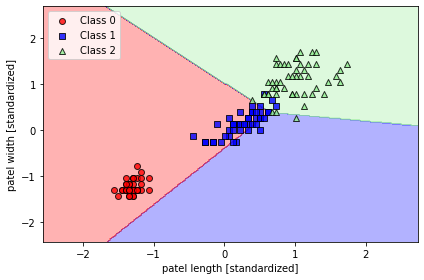

In [13]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_combined_scaled = np.vstack((X_train_scaled, X_test_scaled))
# print(X_combined_scaled.shape)

# print(y_train.shape)
# print(y_test.shape)
y_combined = np.hstack((y_train, y_test))
# print(y_combined.shape)

plot_decision_regions(X=X_combined_scaled, y=y_combined, classifier=ppn)

plt.xlabel('patel length [standardized]')
plt.ylabel('patel width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


**Conclusion**: the three flower classes cannot be perfectly separated by a linear decision boundary.   


---

# Modelling Class Probabilities via Logistic Regression {-}

The main problem with Perceptron is that it does not converge to fixed values for weights if classes are not perfectly linearly separable, see e.g. previous image. 
- In Week 2 we saw that the weights will keep getting updated as long as there is a single misclassification 
- There are other linear classifiers which will converge to a cost minimum even if he classes are not linearly separable

**Logistic regression** is one of the most widely used classification models in the industry
- Basic logistic regression is used for binary classification
- Multiclass classification can be done either via *OvR* or multinomial logistic regression (softmax regression) 
    - see [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

---

### Theory behind Logistic Regression {-}

Let us introduce the following:
- There are only two events, $A$ and $B$, e.g. $A=$pass BUSA3020, $B=$fail BUSA3020
- variable $y=1$ if $A$ occurs and $y=0$ if $B$ occurs
- $p$ - probability of event $A$, e.g. $p = 60\%=0.6$
- $P(y=1)=p\Rightarrow P(y=0)=1-P(y=1)=1-p$
- **odds** - odds in favour of event $A$ (or equivalently $y=1$), $\text{odds}=\frac{p}{1-p}$
    - e.g. odds=$\frac{0.6}{0.4}=\frac{3}{2}$ this can be said "3 to 2 odds" meaning that out of 5 students, odds are that 3 students will pass (events $A$) and 2 students will fail (event $B$)

<br>
<br>

Having the above definitions we can now introduce the **logit function** $\text{logit}(p)=\text{logit(P[y=1])}=\text{ln}(\frac{p}{1-p})$   
where **ln** is the natural logarithm function. Note the following:

- $(\frac{p}{1-p})\in[0,\infty)$ 
- $\text{logit}(p)=\text{ln}(\frac{p}{1-p})\in(-\infty, \infty)$ 

```
p = np.arange(0.00000001, 1, 0.049999999)
print('p', p)
odds = p / (1-p)
print('odds', odds)
logit = np.log(odds)
print('logit', logit)

plt.plot(logit)
plt.show()
```

p [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
odds [1.000e-08 5.263e-02 1.111e-01 1.765e-01 2.500e-01 3.333e-01 4.286e-01
 5.385e-01 6.667e-01 8.182e-01 1.000e+00 1.222e+00 1.500e+00 1.857e+00
 2.333e+00 3.000e+00 4.000e+00 5.667e+00 9.000e+00 1.900e+01 1.000e+08]
logit [-18.421  -2.944  -2.197  -1.735  -1.386  -1.099  -0.847  -0.619  -0.405
  -0.201   0.      0.201   0.405   0.619   0.847   1.099   1.386   1.735
   2.197   2.944  18.421]


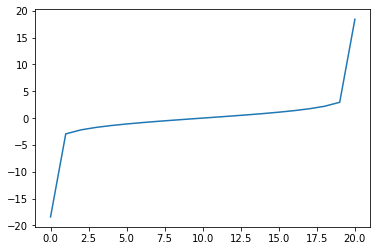

In [14]:
p = np.arange(0.00000001, 1, 0.049999999)
print('p', p)
odds = p / (1-p)
print('odds', odds)
logit = np.log(odds)
print('logit', logit)

plt.plot(logit)
plt.show()


---


We are familiar with the notion of conditional probability $P(y=1|x)$ which gives the probability that $y=1$ given that $x$ takes on some value
- e.g. probability that a student will pass BUSA3020 $(y=1)$ given that the student has studied 4 hours per day $(x=4)$, i.e.  $P(y=1|x=4)$
- this is clearly different from $P(y=1)$

Similary we can define the **log-odds** using the logit function $\text{logit}\left(P(y=1|x)\right)=\text{ln}\left(\frac{P(y=1|x)}{1-P(y=1|x)}\right)$ 

Now lets say that $\text{logit}\left(P(y=1|x)\right)$ can in fact be represented as a linear function of the features - $x$ variables:

$z=\text{logit}\left(P(y=1|x)\right)=w_0x_0+w_1x_1+\dots+w_mx_m=\sum_{i=0}^{m}w_ix_i=\mathbf{w}^{T}\mathbf{x}$

To be able to predict (get the probability) that a certain example belongs to a particular class we need the **inverse** of the logit function
- The inverse of the logistic function is called the **logistic sigmoid function** or just **sigmoid function** or **logistic tranformation**
- $P(y=1|x)=\phi(z)=\frac{1}{1+e^{-z}}$

where $z$ is the net input given by <span style='background:lightblue'> $z=\text{logit}\left(P(y=1|x)\right)=w_0x_0+w_1x_1+\dots+w_mx_m$ </span> in this case.

Lets see what $\phi(z)$ looks like:

```

import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1.0 + np.exp(-z))

z = np.arange(-7, 7.1, 0.1)
print(z, type(z))

phi_z = sigmoid(z)
print(phi_z)

plt.plot(z, phi_z)
plt.xlabel('z')
plt.axvline(0.0, color='gray')
plt.ylabel('$\phi(z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()
```


[-7.  -6.9 -6.8 -6.7 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 -6.  -5.9 -5.8 -5.7
 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3
 -4.2 -4.1 -4.  -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9
 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5
 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1
 -0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7. ] <class 'numpy.ndarray'>
[0.001 0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.002 0.002 0.002 0.003
 0.003 0.003 0.004 0.004 0.004 0.005 0.005 0.006 0.007 0.007 0.008 0.009
 0.01  0.011 0.012 0.013 0.015 0.016 0.018 0.02  0.022 0.024 0.027 0.029
 0.032 0.036 0.039 0.043 0.047 0.052 0.0

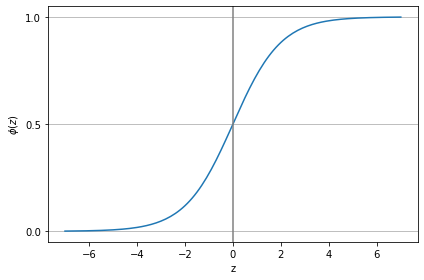

In [16]:
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1.0 + np.exp(-z))

z = np.arange(-7, 7.1, 0.1)
print(z, type(z))

phi_z = sigmoid(z)
print(phi_z)

plt.plot(z, phi_z)
plt.xlabel('z')
plt.axvline(0.0, color='gray')
plt.ylabel('$\phi(z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

We observe the following:
- The graph resembles an S-shaped curve
- $z\rightarrow\infty\Rightarrow\phi(z)\rightarrow1$
- $z\rightarrow-\infty\Rightarrow\phi(z)\rightarrow0$
- Since $\phi(z)\in[0,1]$ it can be used to model probabilities. For example we can use it in:
    - Credit card fraud detection: predict whether a person will default and also the probability of default
    - Weather forecasting: predict if it will rain and the chance of rain
    - Medical applications: decide if a patient has a disease and the chance of the disease given the symptoms
    - Etc.



---

Consider the comparison of **Logistic Regression** with **Perceptron** and **Adaline**:

<hr style="width:15%;margin-left:0;">

**Perceptron**
    
$z=w_0 + w_1x_1 +  w_2x_2=\sum_{j=0}^{3}w_jx_j=\mathbf{w}^{T}\mathbf{x}$

$\phi(z)=\left\{ 
\begin{array}{cc}
1 & \text{if } z \ge 0 \hfill \\ 
0 & \text{otherwise,}
\end{array}
\right.$

$\hat{y}=\phi(z)$

<hr style="width:15%;margin-left:0;">

**Adaline**

$z=w_0 + w_1x_1 +  w_2x_2=\sum_{j=0}^{3}w_jx_j=\mathbf{w}^{T}\mathbf{x}$

$\phi(z)=\phi(w^{T}x)=w^{T}x$

$\hat{y}=\left\{ 
\begin{array}{cc}
1 & \text{if } \phi(z) \ge 0 \hfill \\ 
0 & \text{otherwise}
\end{array}
\right.$

<hr style="width:15%;margin-left:0;">

**Logistic Regression**

$z=w_0 + w_1x_1 +  w_2x_2=\sum_{j=0}^{3}w_jx_j=\mathbf{w}^{T}\mathbf{x}$

$\phi(z)=\frac{1}{1+e^{-z}}$

The sigmoid function is interpreted as the *conditional probability* of a particular example belonging to class 1:

- $P(y=1|x)=\phi(z)$
- $P(y=0|x)= 1- P(y=1|x)$

E.g. $\phi(z)=0.8$ means that the probability that the flower is Iris-Versicolor is 80% and the prob that it is Iris-Setosa is 20%.

$\hat{y}=\left\{ 
\begin{array}{cc}
1 & \text{if } \phi(z) \ge 0.5 \hfill \\ 
0 & \text{otherwise}
\end{array}
\right.$

Equivallently we can use

$\hat{y}=\left\{ 
\begin{array}{cc}
1 & \text{if } z \ge 0 \hfill \\ 
0 & \text{otherwise}
\end{array}
\right.$


<img src="images/image1.jpg" alt="Drawing" style="width: 450px;"/>

![](images/image1.jpg)

---

## Learning the Weights of the Logistic Cost Function {-}

The estimating (fitting) of the parameters in the Logistic Regression model is based on the principle of **Maximum Likelihood Estimation (MLE)**. MLE is a method of estimating the parameters of a probability distribution by maximizing a **likelihood function**, so that under the assumed statistical model the observed data is most probable. 

The point in the parameter space that maximizes the likelihood function is called the **maximum likelihood estimate**. The logic of maximum likelihood is both intuitive and flexible, and as such the method has become a dominant means of statistical inference. For more details on MLE see [https://en.wikipedia.org/wiki/Maximum_likelihood_estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

- Maximum Likelihood Estimation is beyond the scope of this unit
- If interested in further details refer to the above URL as well as the textbook

---

## Training a Logistic Regression Model with `scikit-learn` {-}

- `sklearn.linear_model.LogisticRegression` class
    - [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- As mentioned above `scikit-learn` implements multiclass classification by default via two methods OvR or multinomial
    - `multi_class='ovr`
    - `multi_class='multinomial'` - recommended for multually exclusive classes
    
```
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_scaled, y_train)
plot_decision_regions(X_combined_scaled, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('patel length [standardized]')
plt.ylabel('patel width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
```

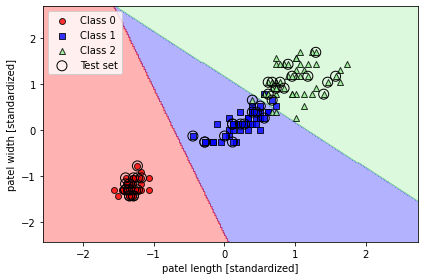

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_scaled, y_train)
plot_decision_regions(X_combined_scaled, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('patel length [standardized]')
plt.ylabel('patel width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


As you can see there are a number of options we need to provide to initialize `LogisticRegression`

- Optimization algorithm 
- We use Limited-memory BFGS here using `solver='lbfgs'`. This is a more sophisticated optimization algorithm based on the second derivative (Hessian matrix). See [https://en.wikipedia.org/wiki/Limited-memory_BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)
- `C` parameter refers to 'Inverse of regularization strength' - see below


Lets make the following forecasts for the first 4 rows of the test set:
- forecast the probability that each of the four examples belongs in each of the three categories using `predict_proba()`
- forecast which category each of the four examples will belong to using `predict()`

```
print(X_test_scaled[:4, :])
print(2*'\n')

# print(lr.predict_proba(X_test_scaled[:4, :]))
print(np.around(lr.predict_proba(X_test_scaled[:4, :]), 3)) # round off to 3 decimal places
```

In [18]:
print(X_test_scaled[:4, :])
print(2*'\n')

# print(lr.predict_proba(X_test_scaled[:4, :]))
print(np.around(lr.predict_proba(X_test_scaled[:4, :]), 3)) # round off to 3 decimal places

[[ 1.407  0.775]
 [-1.284 -1.436]
 [-0.443 -0.135]
 [-1.228 -1.306]]



[[0.    0.433 0.567]
 [0.771 0.229 0.   ]
 [0.144 0.856 0.   ]
 [0.79  0.21  0.   ]]


Given our classes 

- 0 - Iris-setosa
- 1 - Iris-versicolor
- 2 - Iris-virginica

we see that the first flower has about 57% chance of being Iris-virginica, While the second flower has 77% chance of being an Iris-setosa. These are conditional probabilities of each flower belonging to a class based on their petal characteristics. 

To get predicted class labels $\hat{y}^{(i)}\in{0, 1, 2}$ we just choose the class which corresponds with the **highest** probability

```
print(lr.predict_proba(X_test_scaled[:4, :]).argmax(axis=1))
```

A simpler way to do the same thing is 
```
print(lr.predict(X_test_scaled[:4, :]))
```

Note: When forecasting from a single example (single row slice) which has only one dimension we need to first create a 2-D array which `scikit-learn` expects. Do this using `reshape` command

```
print(X_test_scaled[0, :])
print(X_test_scaled[0, :].shape)
print(X_test_scaled[0:2, :].shape)

print(X_test_scaled[0, :].reshape(1, -1))
print(X_test_scaled[0, :].reshape(1, -1).shape)



# print(lr.predict(X_test_scaled[0, :]))
print(lr.predict(X_test_scaled[0, :].reshape(1, -1)))
```

---
## Avoiding Overfiting via Regularization {-}

**Overfitting** - when a model performs well on training data but does not generalize well to unseen data (generates bad forecast on new data)

**Underfitting** - when a model is too simple to capture the patterns found in training data 

**Bias-Variance Tradeoff**

- **High Variance**
    - Overfitting typically happens when the model is too complex and has too many parameters -> likely to pick up random noise
    - Imagine training an overly complex model on multiple datasets -> each time model will 'learn' what appears to be a different pattern in each dataset, but is in fact noise which does not repeat again
    - When we forecast the same example/observation from such multiple models there is likely to be high **variability** in the prediction across the trained models because each model is trained to predict based on the noise that it remembered
    - We say that such a model has **high variance** because the predictions are highly variables from one version of the model to the next


- **High Bias**
    - Bias measures how different the predictions are from the correct values if we rebuild the model multiple times on different training data
    - It is a measure of systematic error which is not due to randomness
    - Models which are too simple (underfitted) will not be able to predict test data correctly and will be far off from true value -> will have **high bias**
    
    

<img src="images/image2.jpg" alt="Drawing" style="width: 450px;"/>

![](images/image2.jpg)
    
**Regularization** is the process of adding information in order to prevent overfitting and reach a good bias-variance tradeoff.
- In ML regularization works by adding information to penalize large parameter (weight) values
- Regularization helps with collinearity (high correlation among features)
- For regularization to work properly all features must be on comparable scale -> **feature scaling** is important
- **L2 regularization** (L2 shrinkage) most common, where $\lambda$ is called the **regularization parameter**
    - By increasing $\lambda$ we increase regularization strength, penalizing more large parameter values and hence obtaining more parameters closer to zero-> less overfit
    - in `LogisticRegression` $C=\frac{1}{\lambda}$ -> small $C$ = large $\lambda$ -> will reduce the magnitude of the estimated parameters

Regularization term $\frac{\lambda}{2}||w||^2=\frac{\lambda}{2}\sum_{j=1}^{m}w_j^2$ is often added to the Logistic Regression cost function, which will shrink (make smaller) estimated parameters (weights)

$J(w)=\sum_{i=1}^n\left[-y^{(i)}\text{ln}\left(\phi(z^{(i)})\right)-\left(1-y^{(i)}\right)\text{ln}\left(1-\phi(z^{(i)})\right)\right] + \frac{\lambda}{2}||w||^2$
